## STREETS Data 시각화

### import 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [65]:
# 최대 출력할 행 수 설정
pd.set_option('display.max_rows', None)

# 최대 출력할 열 수 설정
pd.set_option('display.max_columns', None)

In [55]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/font/NanumGothic-Regular.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

### 과제 1 : 시간에 따른 교통 사고의 타입별 추치화 x 축 시간 y축 사건 타입 4가지(꺽은선 그래프)

In [18]:
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

df = pd.read_excel(path)


In [19]:
df.head(10)

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,startcrossstreet,endcrossstreet,responsestart,createtime
0,929916,Stall,I94,3,1,IL-60 (Town Line Rd),IL-60 (Town Line Rd),NaT,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,Old US Hwy 41,Old US Hwy 41,NaT,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,Casey Rd,Casey Rd,NaT,2018-08-20 00:07:39
3,929919,Other,I94,4,1,Everett Rd,Everett Rd,NaT,2018-08-20 00:08:12
4,929920,Weather,NaN,1,0,NaN,NaN,NaT,2018-08-20 00:29:31
5,929921,Stall,I94,3,1,IL-120 (Belvidere Rd),IL-120 (Belvidere Rd),NaT,2018-08-20 00:39:43
6,929922,Fire,Unknown,0,3,NaN,NaN,NaT,2018-08-20 00:41:39
7,929923,Weather,NaN,1,0,NaN,NaN,NaT,2018-08-20 00:59:31
8,929924,Fire,Washington St,3,3,Hainesville Rd,Hainesville Rd,NaT,2018-08-20 01:05:39
9,929925,Weather,NaN,1,0,NaN,NaN,NaT,2018-08-20 01:29:31


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventid             12543 non-null  int64         
 1   eventtype           12543 non-null  object        
 2   road                11680 non-null  object        
 3   roaddirection       12543 non-null  int64         
 4   MaxOftrafficimpact  12543 non-null  int64         
 5   startcrossstreet    7584 non-null   object        
 6   endcrossstreet      7584 non-null   object        
 7   responsestart       1574 non-null   datetime64[ns]
 8   createtime          12543 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 882.1+ KB


#### 총 9개의 컬럼으로 구성
#### 12543개의 행으로 구성
#### 날짜는 8월 20일 부터 9월 20일까지로 구성
#### 해당 데이터의 null 값을 갖는 행의 수 :
#### 해당 데이터의 null 값을 갖는 열의 수 :
#### 해당 데이터를 이용해서 예측하는 모델을 만드는 것도 재미있을 듯

## df.iloc -> 행번호, 열번호

In [21]:
# df.iloc[행번호, 열번호]


df.iloc[1,1]

'Accident'

### 수치형 변수와 범주형 변수를 출력하기

In [22]:
df.select_dtypes(exclude=object).columns

Index(['eventid', 'roaddirection', 'MaxOftrafficimpact', 'responsestart',
       'createtime'],
      dtype='object')

In [23]:
df.select_dtypes(include=object).columns

Index(['eventtype', 'road', 'startcrossstreet', 'endcrossstreet'], dtype='object')

In [24]:
df.describe()

,eventid,roaddirection,MaxOftrafficimpact,responsestart,createtime
count,12543.000000,12543.000000,12543.000000,1574,12543
mean,935674.119031,1.869409,1.928167,2018-09-04 12:37:18.970139904,2018-09-04 17:12:22.427888128
min,929916.000000,0.000000,0.000000,2018-08-20 06:01:35,2018-08-20 00:03:30
25%,932779.500000,1.000000,1.000000,2018-08-27 15:21:48.750000128,2018-08-28 08:32:02.500000
50%,935683.000000,2.000000,2.000000,2018-09-05 07:27:07.500000,2018-09-04 15:29:31
75%,938564.500000,3.000000,3.000000,2018-09-12 16:16:15,2018-09-12 10:40:40
max,958076.000000,4.000000,4.000000,2018-09-20 17:55:57,2018-09-20 23:33:39
std,3347.696768,1.460207,0.941702,NaN,NaN


In [25]:
import pandas as pd
import seaborn as sns


# 널 값이 존재하는 행의 수
null_rows = df[df.isnull().any(axis=1)].shape[0]

# 널 값이 존재하는 열의 수
null_cols = df.isnull().sum()[df.isnull().sum() > 0].shape[0]

print(f"널 값이 존재하는 행의 수: {null_rows}")
print(f"널 값이 존재하는 열의 수: {null_cols}")



널 값이 존재하는 행의 수: 11199
널 값이 존재하는 열의 수: 4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventid             12543 non-null  int64         
 1   eventtype           12543 non-null  object        
 2   road                11680 non-null  object        
 3   roaddirection       12543 non-null  int64         
 4   MaxOftrafficimpact  12543 non-null  int64         
 5   startcrossstreet    7584 non-null   object        
 6   endcrossstreet      7584 non-null   object        
 7   responsestart       1574 non-null   datetime64[ns]
 8   createtime          12543 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 882.1+ KB


In [27]:
df.columns

Index(['eventid', 'eventtype', 'road', 'roaddirection', 'MaxOftrafficimpact',
       'startcrossstreet', 'endcrossstreet', 'responsestart', 'createtime'],
      dtype='object')

### 각 열별 널 값의 수 계산

In [28]:
# 각 열별 널 값의 수 계산
null_counts = df.isnull().sum()

print(null_counts)

eventid                   0
eventtype                 0
road                    863
roaddirection             0
MaxOftrafficimpact        0
startcrossstreet       4959
endcrossstreet         4959
responsestart         10969
createtime                0
dtype: int64


### 각 열별 NULL 값을 통한 insight는 responsestart 같은 경우는 null이 많아서 처리 불가능 -> 삭제

### 추가적으로 사고 시작과 사고끝은 크게 의미없으니까 하지말자

In [29]:
drop_df = df.drop(columns= ["startcrossstreet","endcrossstreet","responsestart" ])

### null 값이 약 50% 정도가 되고 데이터를 시각화 하는데 크게 중요하지 않기 때문에 제외시킴["startcrossstreet","endcrossstreet","responsestart" ]

In [30]:
drop_df.head()

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
0,929916,Stall,I94,3,1,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,2018-08-20 00:07:39
3,929919,Other,I94,4,1,2018-08-20 00:08:12
4,929920,Weather,NaN,1,0,2018-08-20 00:29:31


In [31]:
drop_df.isnull().sum()

eventid                 0
eventtype               0
road                  863
roaddirection           0
MaxOftrafficimpact      0
createtime              0
dtype: int64

In [32]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventid             12543 non-null  int64         
 1   eventtype           12543 non-null  object        
 2   road                11680 non-null  object        
 3   roaddirection       12543 non-null  int64         
 4   MaxOftrafficimpact  12543 non-null  int64         
 5   createtime          12543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 588.1+ KB


In [33]:
import pandas as pd

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'eventtype' 열의 고유 값과 그 빈도수
eventtype_values = df['eventtype'].value_counts()
print("eventtype 열의 고유 값과 빈도수:")
print(eventtype_values)

# 'road' 열의 고유 값과 그 빈도수
road_values = df['road'].value_counts()
print("\nroad 열의 고유 값과 빈도수:")
print(road_values)


eventtype 열의 고유 값과 빈도수:
eventtype
Accident           4423
Stall              1830
Debris             1687
Fire               1347
Incident           1222
Other               885
Weather             864
Signal Flash        109
Signal Out           85
Roadwork             52
Congestion           17
Police Activity      11
Signing Only          8
Special Event         3
Name: count, dtype: int64

road 열의 고유 값과 빈도수:
road
Unknown                2988
I94                    1983
Lake-Cook Rd            320
US Hwy 41               319
IL Rte 120              272
                       ... 
Crane Blvd                1
Countryside Lake Dr       1
Lions Rd                  1
Echo Lake Rd              1
Hickory St                1
Name: count, Length: 229, dtype: int64


<!-- eventtype 열의 고유 값과 빈도수:
eventtype
Accident           4423
Stall              1830
Debris             1687
Fire               1347
Incident           1222
Other               885
Weather             864
Signal Flash        109
Signal Out           85
Roadwork             52
Congestion           17
Police Activity      11
Signing Only          8
Special Event         3 -->

## 1. 시간에 따른 사고의 타입별 수치화 x 축 시간 y축 사건 타입 4가지(꺽은선 그래프)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

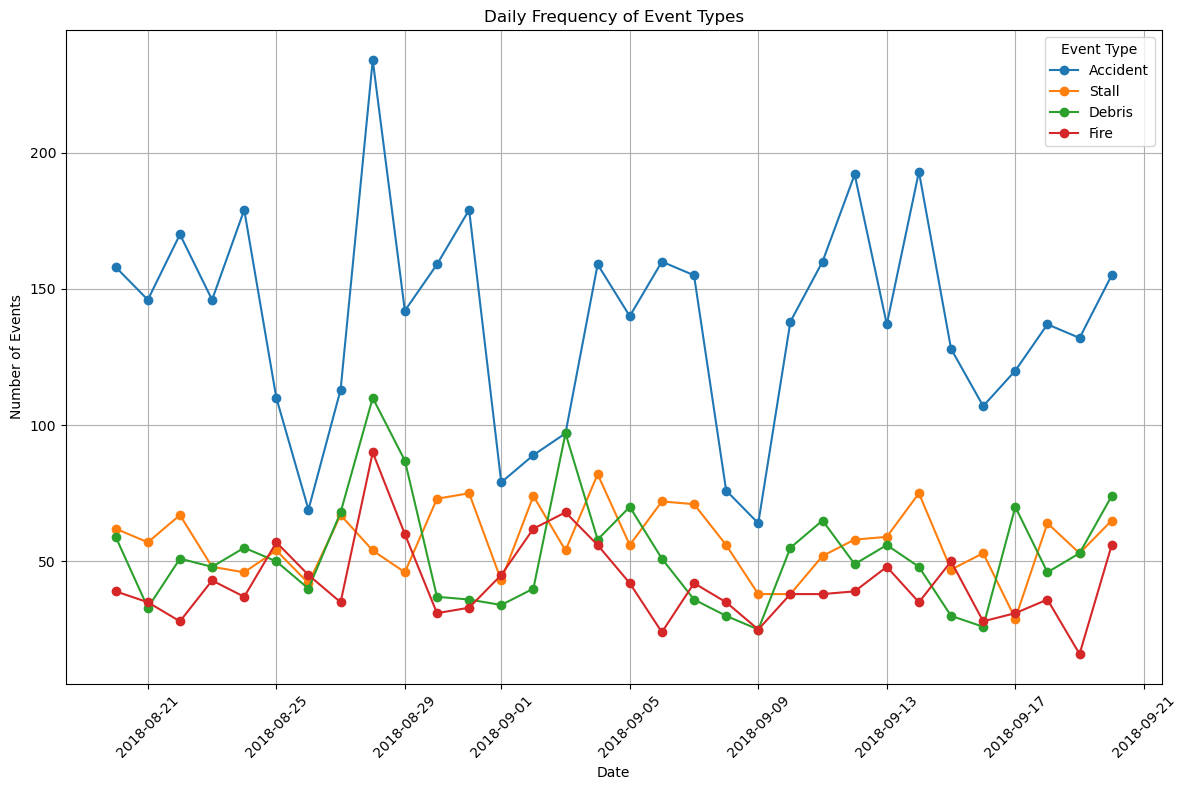

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 사건 타입과 날짜로 그룹화하여 카운트 계산
daily_counts = df.groupby([df['createtime'].dt.date, 'eventtype']).size().unstack(fill_value=0)

# 주요 사건 타입 선택
selected_types = ['Accident', 'Stall', 'Debris', 'Fire']

# 해당 사건 타입만 필터링
daily_counts = daily_counts[selected_types]

# 시각화
plt.figure(figsize=(12, 8))
for event_type in selected_types:
    plt.plot(daily_counts.index, daily_counts[event_type], marker='o', label=event_type)

plt.title('Daily Frequency of Event Types')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(title='Event Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


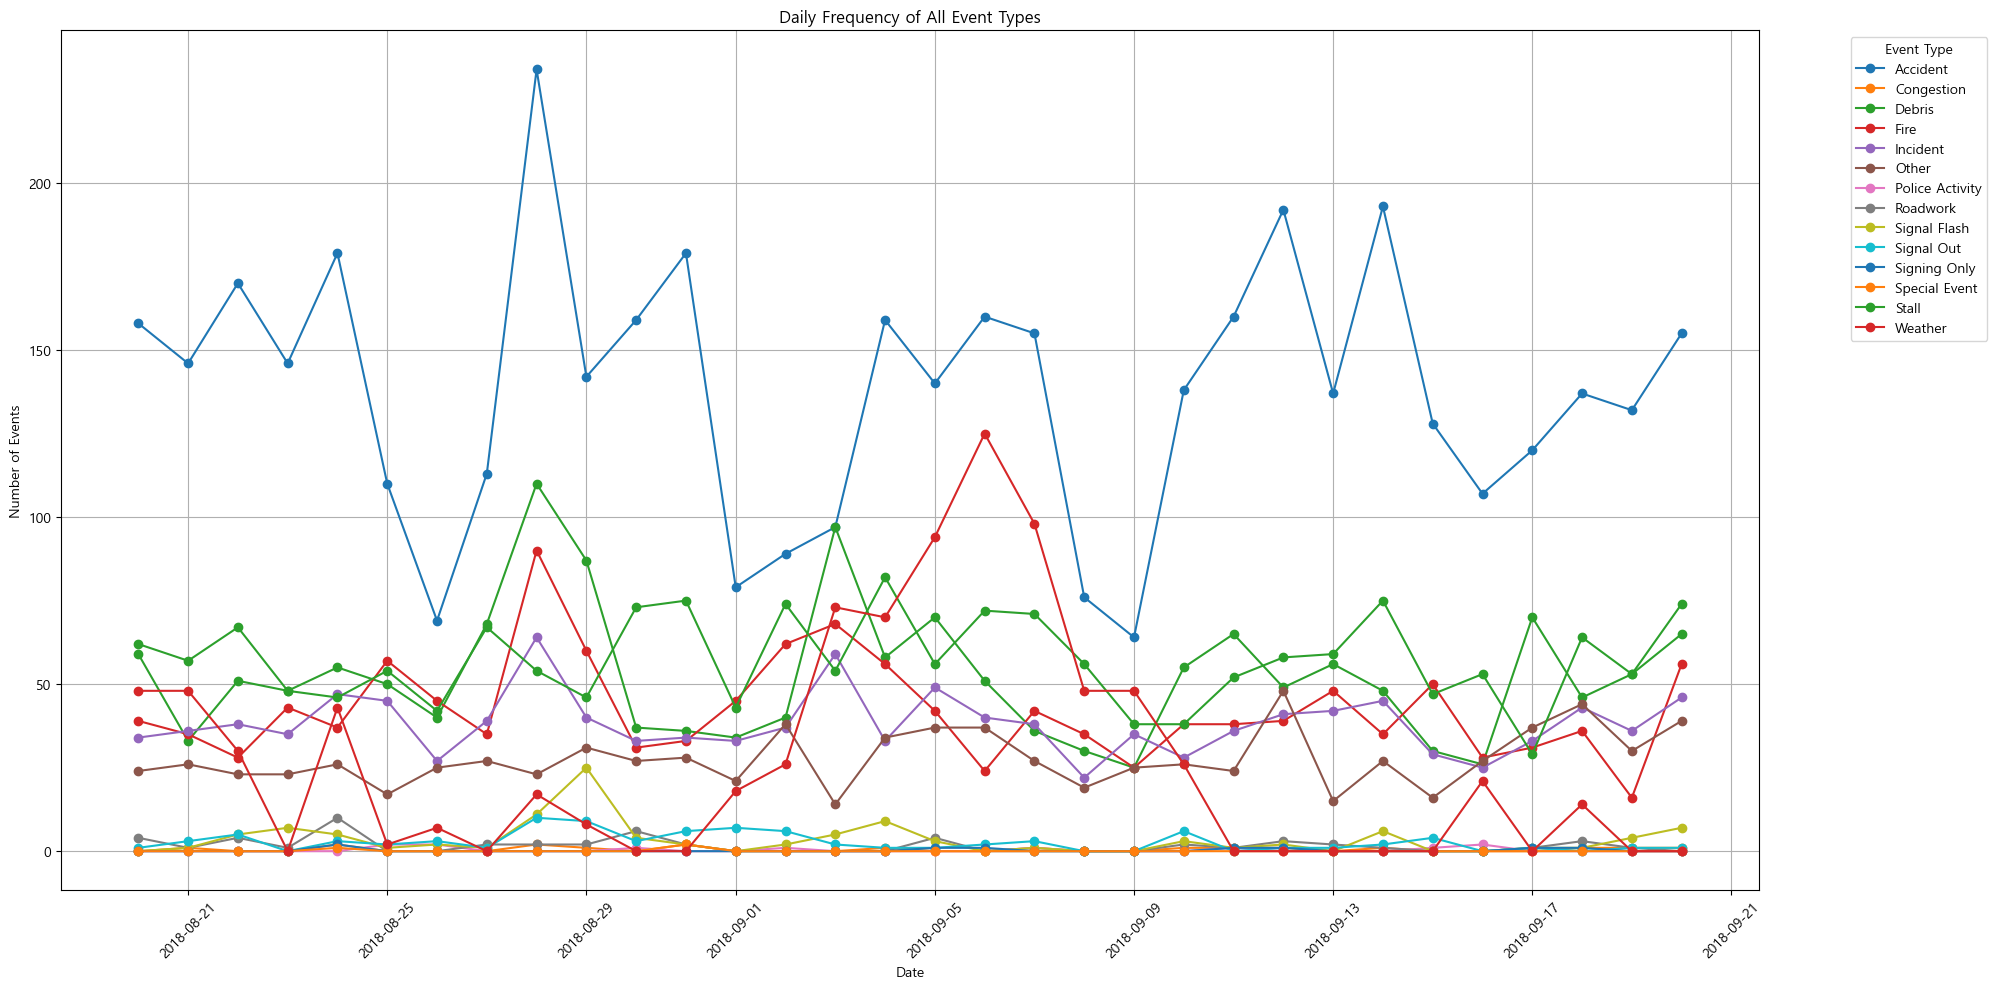

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 사건 타입과 날짜로 그룹화하여 카운트 계산
daily_counts = df.groupby([df['createtime'].dt.date, 'eventtype']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(20, 10))
for event_type in daily_counts.columns:
    plt.plot(daily_counts.index, daily_counts[event_type], marker='o', label=event_type)

plt.title('Daily Frequency of All Event Types')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\khds0\AppData\Local\Temp\ipykernel_18512\3385586431.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)


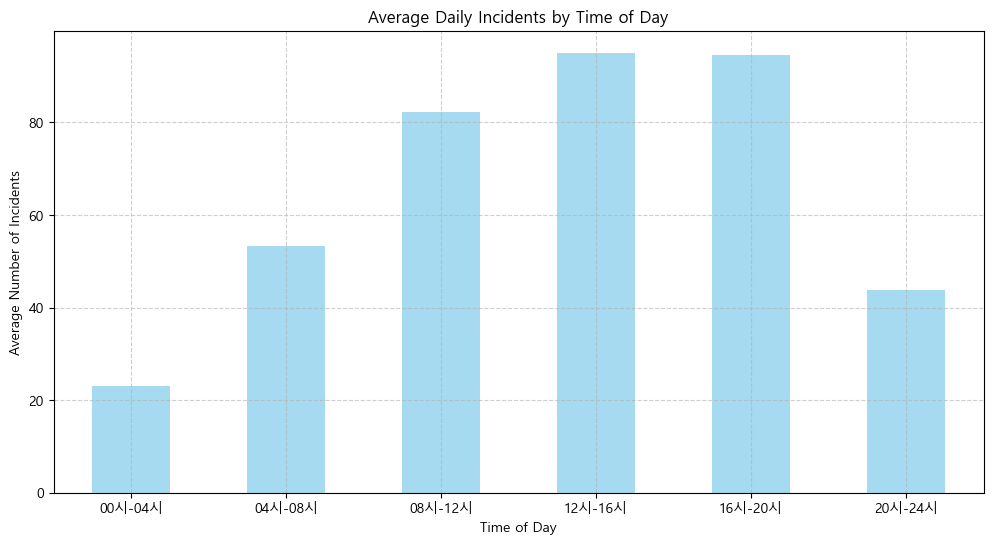

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 시간대를 기반으로 구간 설정 (00시, 04시, 08시, 12시, 16시, 20시, 24시)
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['00시-04시', '04시-08시', '08시-12시', '12시-16시', '16시-20시', '20시-24시']
df['time_bin'] = pd.cut(df['createtime'].dt.hour, bins=bins, labels=labels, right=False, include_lowest=True)

# 일별 및 시간대별로 그룹화하여 사건 수 집계
grouped = df.groupby([df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)

# 일 평균 사건 발생 수 계산
daily_average = grouped.mean()

# 시각화
daily_average.plot(kind='bar', figsize=(12, 6), color='skyblue', alpha=0.75)
plt.title('Average Daily Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Incidents')
plt.xticks(rotation=0)  # X축 라벨 회전 설정
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\khds0\AppData\Local\Temp\ipykernel_18512\415677091.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['eventtype', df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)


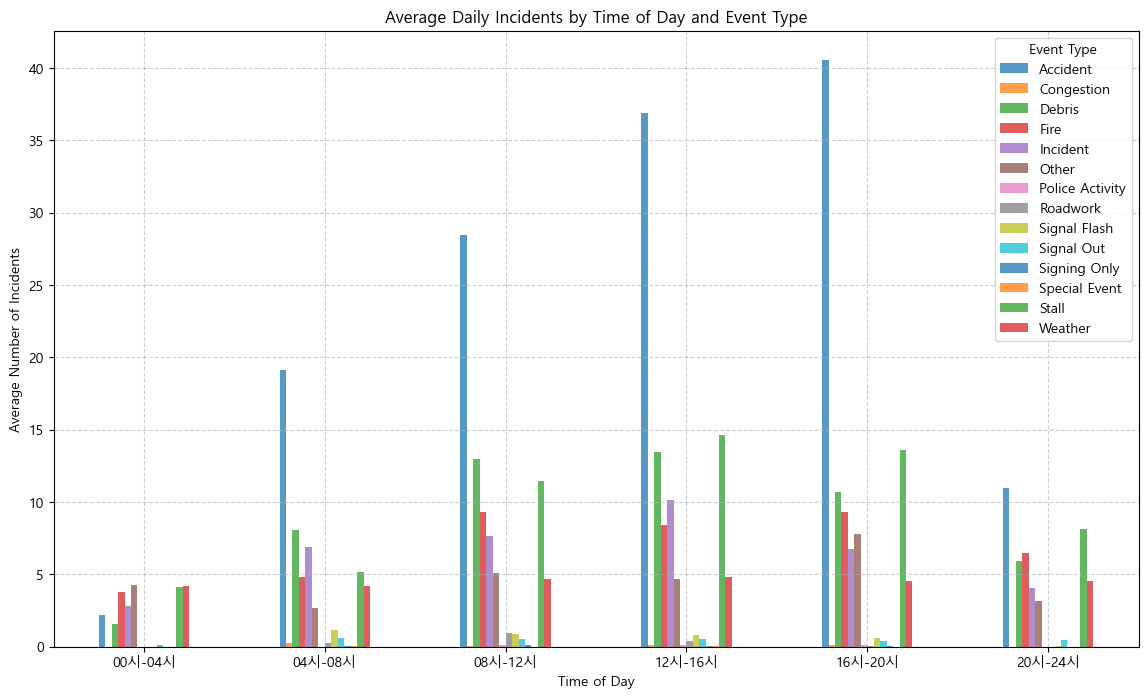

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 파일 경로
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'

# 데이터 불러오기
df = pd.read_excel(path)

# 'createtime' 열을 datetime 형태로 변환
df['createtime'] = pd.to_datetime(df['createtime'])

# 시간대를 기반으로 구간 설정 (00시, 04시, 08시, 12시, 16시, 20시, 24시)
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['00시-04시', '04시-08시', '08시-12시', '12시-16시', '16시-20시', '20시-24시']
df['time_bin'] = pd.cut(df['createtime'].dt.hour, bins=bins, labels=labels, right=False, include_lowest=True)

# 일별, 시간대별 및 사고 타입별로 그룹화하여 사건 수 집계
grouped = df.groupby(['eventtype', df['createtime'].dt.date, 'time_bin']).size().unstack(fill_value=0)

# 일 평균 사건 발생 수 계산
daily_average = grouped.groupby(level=0).mean()

# 시각화
fig, ax = plt.subplots(figsize=(14, 8))
daily_average.T.plot(kind='bar', ax=ax, alpha=0.75, rot=0)
plt.title('Average Daily Incidents by Time of Day and Event Type')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Incidents')
plt.legend(title='Event Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 과제 2  : 시간에 따른 교통 사고 수치화 x축 시간(00시 04시 08시 12시 16시 20시 00시)(일 평균내기), y축 사건 발생 수 ( bar 차트)

In [38]:
drop_df.head()

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
0,929916,Stall,I94,3,1,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,2018-08-20 00:07:39
3,929919,Other,I94,4,1,2018-08-20 00:08:12
4,929920,Weather,NaN,1,0,2018-08-20 00:29:31


In [41]:
drop_df.isnull().sum()

eventid                 0
eventtype               0
road                  863
roaddirection           0
MaxOftrafficimpact      0
createtime              0
dtype: int64

In [45]:
# 'column_name' 열에서 널 값이 있는 행을 삭제
drop_df = drop_df.dropna(subset=['road'])
drop_df.head()


,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
0,929916,Stall,I94,3,1,2018-08-20 00:03:30
1,929917,Accident,I94,2,1,2018-08-20 00:03:39
2,929918,Stall,IL Rte 21,2,1,2018-08-20 00:07:39
3,929919,Other,I94,4,1,2018-08-20 00:08:12
5,929921,Stall,I94,3,1,2018-08-20 00:39:43


In [46]:
drop_df.isnull().sum()

eventid               0
eventtype             0
road                  0
roaddirection         0
MaxOftrafficimpact    0
createtime            0
dtype: int64

In [53]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


In [71]:
# 최대 출력할 행 수 설정
pd.set_option('display.max_rows', None)

# 최대 출력할 열 수 설정
pd.set_option('display.max_columns', None)


## 장소에 따른 사건 타입 수치화 x축 지역이름 y축 사건 타입(bar 차트)

eventtype                       Accident  Congestion  Debris  Fire  Incident  \
road                                                                           
10th St                                7           0       0     0         0   
14th St                               11           0       0     0         1   
21st St                                5           0       1     2         0   
23rd St                                1           0       0     1         0   
27th St                               10           0       0     1         0   
29th St                                7           0       0     1         0   
31st St                                6           0       0     3         0   
33rd St                                3           0       1     2         0   
9th St                                 1           0       1     0         0   
Allanson Rd                           14           0       1     5         0   
Alleghany Rd                           0

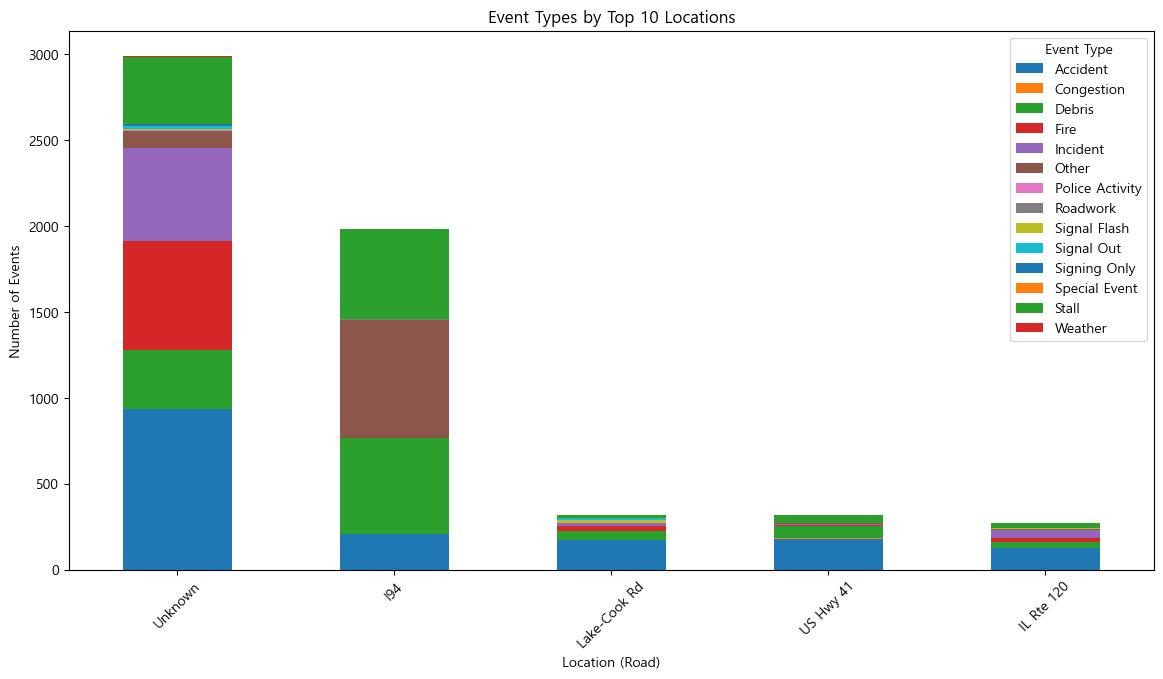

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
path = 'C:/Users/khds0/OneDrive/바탕 화면/STREETS_Data/incidents/incidents/raw-incident-data.xlsx'
df = pd.read_excel(path)

# 사건 수 계산
road_counts = df.groupby(['road', 'eventtype']).size().unstack(fill_value=0)

print(road_counts)

# 사건 수를 기준으로 상위 10개 장소 선택
top_roads = road_counts.sum(axis=1).nlargest(5).index

# 상위 10개 장소의 데이터만 필터링
filtered_data = road_counts.loc[top_roads]

# 시각화
filtered_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Event Types by Top 10 Locations')
plt.xlabel('Location (Road)')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()


In [52]:
drop_df.loc[drop_df["road"] == "Unknown"]

,eventid,eventtype,road,roaddirection,MaxOftrafficimpact,createtime
6,929922,Fire,Unknown,0,3,2018-08-20 00:41:39
25,929940,Incident,Unknown,0,3,2018-08-20 06:27:39
27,929942,Fire,Unknown,0,3,2018-08-20 06:29:39
43,929955,Fire,Unknown,0,3,2018-08-20 07:19:39
49,929960,Incident,Unknown,0,2,2018-08-20 07:39:38
...,...,...,...,...,...,...
12516,941412,Stall,Unknown,0,1,2018-09-20 20:42:01
12521,941417,Stall,Unknown,0,1,2018-09-20 21:05:13
12525,941421,Stall,Unknown,0,2,2018-09-20 21:13:39
12530,941426,Stall,Unknown,0,1,2018-09-20 21:27:38


In [49]:
# 'column_name' 열의 고유 값과 그 빈도수 계산
value_counts = df['road'].value_counts()

# 결과 출력
print(value_counts)


road
Unknown                2988
I94                    1983
Lake-Cook Rd            320
US Hwy 41               319
IL Rte 120              272
                       ... 
Crane Blvd                1
Countryside Lake Dr       1
Lions Rd                  1
Echo Lake Rd              1
Hickory St                1
Name: count, Length: 229, dtype: int64


### 과제 3 :  장소에 따른 교통 사건 타입 수치화 x축 지역이름 y축 사건 타입(bar 차트)